In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

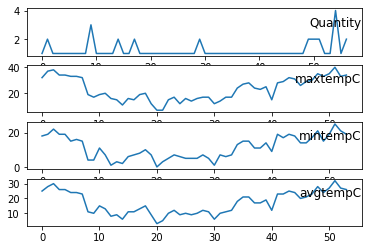

In [4]:
# load dataset
dataset = pd.read_csv('final_merged_cali.csv', header=0, index_col=0)
values = dataset.values
# specify columns to plot
groups = [ 1, 2, 3, 5]
i = 1
# plot each column
plt.figure()
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

Text(0, 0.5, 'Quantity')

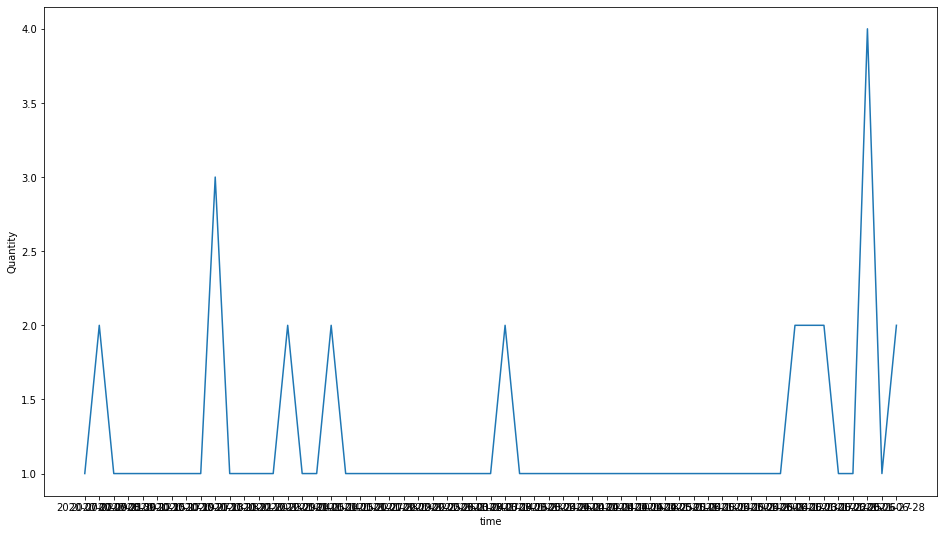

In [5]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=dataset['Quantity'], x=dataset['date_time'])
plt.xlabel('time')
plt.ylabel('Quantity')

In [6]:
dataset.head()

,date_time,Quantity,maxtempC,mintempC,FeelsLikeC,avgtempC,month,Population
0,2020-07-02,1,32.0,18.0,25.0,25.0,7,2383716
1,2020-07-09,2,37.0,19.0,29.0,28.0,7,2383716
2,2020-07-21,1,38.0,22.0,31.0,30.0,7,2383716
3,2020-08-30,1,34.0,19.0,27.0,26.0,8,2383716
4,2020-09-12,1,34.0,19.0,27.0,26.0,9,2383716


# 데이터 정규화 -MinMaxScaler로 전체 데이터는 0, 1사이의 값을 갖도록 해준다.

In [7]:
from sklearn.preprocessing import MinMaxScaler

dataset.sort_index(ascending=False).reset_index(drop=True)
# print(dataset)
scaler = MinMaxScaler()
scale_cols = ['Quantity', 'maxtempC', 'mintempC', 'FeelsLikeC', 'avgtempC', 'month']
df_scaled = scaler.fit_transform(dataset[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

df_scaled

,Quantity,maxtempC,mintempC,FeelsLikeC,avgtempC,month
0,0.000000,0.757576,0.72,0.741935,0.758621,0.545455
1,0.333333,0.909091,0.76,0.870968,0.862069,0.545455
2,0.000000,0.939394,0.88,0.935484,0.931034,0.545455
3,0.000000,0.818182,0.76,0.806452,0.793103,0.636364
4,0.000000,0.818182,0.76,0.806452,0.793103,0.727273
5,0.000000,0.787879,0.60,0.741935,0.724138,0.818182
6,0.000000,0.787879,0.64,0.741935,0.724138,0.818182
7,0.000000,0.757576,0.60,0.709677,0.689655,0.818182
8,0.000000,0.363636,0.16,0.322581,0.275862,0.818182
9,0.666667,0.303030,0.16,0.225806,0.241379,0.909091


In [8]:
TEST_SIZE = 15
WINDOW_SIZE = 3

train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]
len(train)


42

In [9]:
def make_dataset(data, label, window_size=3):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [10]:
from sklearn.model_selection import train_test_split

feature_cols = ['maxtempC', 'mintempC', 'FeelsLikeC', 'avgtempC', 'month']
label_cols = ['Quantity']

train_feature = train[feature_cols]
print(len(train_feature))
train_label = train[label_cols]
print(len(train_label))

train_feature, train_label = make_dataset(train_feature, train_label, 20)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
print(y_train.shape, y_valid.shape)
x_train.shape, x_valid.shape

42
42
(17, 1) (5, 1)


((17, 20, 5), (5, 20, 5))

In [11]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape

((15, 5), (15, 1))

In [12]:
test_feature, test_label = make_dataset(test_feature, test_label, 3)
test_feature.shape, test_label.shape

((12, 3, 5), (12, 1))

# LSTM 모델 객체 생성

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )

model.add(Dense(1))

# 모델 학습 및 weight 값 저장

In [17]:
import os

model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
filename = os.path.join(model_path, 'tmp_checkpoint.tf')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                                    epochs=200, 
                                    batch_size=16,
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint ])

Epoch 1/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0067
Epoch 00001: val_loss improved from inf to 0.00018, saving model to model\tmp_checkpoint.tf
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model\tmp_checkpoint.tf\assets
2/2 [==============================] - 4s 2s/step - loss: 0.0063 - val_loss: 1.8147e-04
Epoch 2/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0066
Epoch 00002: val_loss improved from 0.00018 to 0.00012, saving model to model\tmp_checkpoint.tf
INFO:tensorflow:Assets written to: model\tmp_checkpoint.tf\assets
2/2 [==============================] - 4s 2s/step - loss: 0.0062 - val_loss: 1.2470e-04
Epoch 3/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0066
Epoch 00003: val_loss improved from 0.00012 to 0

# 학습된 weight(가중치) 로드하는 부분에서 오류 -> 해결 필요

In [15]:
! pip install 'h5py==2.10.0' --force-reinstall

ERROR: Invalid requirement: "'h5py==2.10.0'"
You should consider upgrading via the 'c:\users\pc\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [19]:
from keras.models import load_model

# model.load_weights(filename)
pred = model.predict(test_feature)

pred.shape

NameError: name 'fi' is not defined

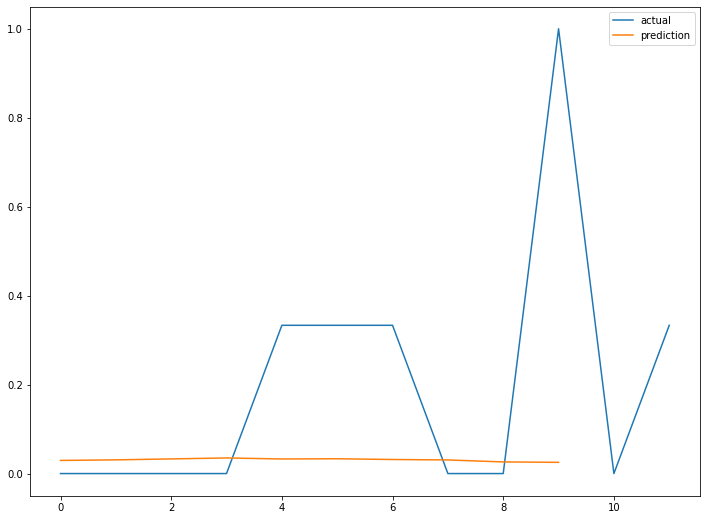

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()